In [9]:
import zipfile
import os

zip_file_path = '/content/bank+marketing.zip'
output_dir = '.'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"'{zip_file_path}' unzipped to '{output_dir}' successfully.")


print("Contents of the unzipped directory:")
print(os.listdir(output_dir))

'/content/bank+marketing.zip' unzipped to '.' successfully.
Contents of the unzipped directory:
['.config', 'bank.csv', 'bank-additional', '__MACOSX', 'bank.zip', 'bank-full.csv', 'bank+marketing.zip', 'bank-names.txt', 'bank-additional.zip', 'sample_data']


In [10]:
import zipfile
import os
import pandas as pd


zip_files_to_unzip = ['bank.zip', 'bank-additional.zip']
output_dir = '.'

for zip_file_name in zip_files_to_unzip:
    zip_file_path = os.path.join(output_dir, zip_file_name)
    if os.path.exists(zip_file_path):
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(output_dir)
        print(f"'{zip_file_name}' unzipped to '{output_dir}' successfully.")
    else:
        print(f"Warning: '{zip_file_name}' not found at '{zip_file_path}'.")


print("\nContents of the current directory after further unzipping:")
current_dir_contents = os.listdir(output_dir)
print(current_dir_contents)


dataset_csv_file = None
for f in current_dir_contents:
    if f.startswith('bank') and f.endswith('.csv') and 'full' in f:
        dataset_csv_file = f
        break

if dataset_csv_file:
    print(f"\nIdentified dataset CSV file: {dataset_csv_file}")

    df = pd.read_csv(os.path.join(output_dir, dataset_csv_file), sep=';')
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())
    print("\nConcise summary of the DataFrame:")
    df.info()
else:
    print("\nError: Could not find the main dataset CSV file (e.g., bank-additional-full.csv).")


'bank.zip' unzipped to '.' successfully.
'bank-additional.zip' unzipped to '.' successfully.

Contents of the current directory after further unzipping:
['.config', 'bank.csv', 'bank-additional', '__MACOSX', 'bank.zip', 'bank-full.csv', 'bank+marketing.zip', 'bank-names.txt', 'bank-additional.zip', 'sample_data']

Identified dataset CSV file: bank-full.csv

First 5 rows of the DataFrame:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5 

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split


df_processed = df.copy()


df_processed['y'] = df_processed['y'].apply(lambda x: 1 if x == 'yes' else 0)

print("Target variable 'y' converted to numerical:")
print(df_processed['y'].value_counts())

categorical_cols = df_processed.select_dtypes(include=['object']).columns
print(f"\nIdentified categorical columns: {list(categorical_cols)}")

df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print("\nDataFrame after one-hot encoding:")
print(df_processed.head())
print(f"\nShape of DataFrame after encoding: {df_processed.shape}")


X = df_processed.drop('y', axis=1)
y = df_processed['y']

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Target variable 'y' converted to numerical:
y
0    39922
1     5289
Name: count, dtype: int64

Identified categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

DataFrame after one-hot encoding:
   age  balance  day  duration  campaign  pdays  previous  y  job_blue-collar  \
0   58     2143    5       261         1     -1         0  0            False   
1   44       29    5       151         1     -1         0  0            False   
2   33        2    5        76         1     -1         0  0            False   
3   47     1506    5        92         1     -1         0  0             True   
4   33        1    5       198         1     -1         0  0            False   

   job_entrepreneur  ...  month_jul  month_jun  month_mar  month_may  \
0             False  ...      False      False      False       True   
1             False  ...      False      False      False       True   
2              True  ...      False      

In [12]:
from sklearn.tree import DecisionTreeClassifier


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


In [13]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8720

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.46      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564



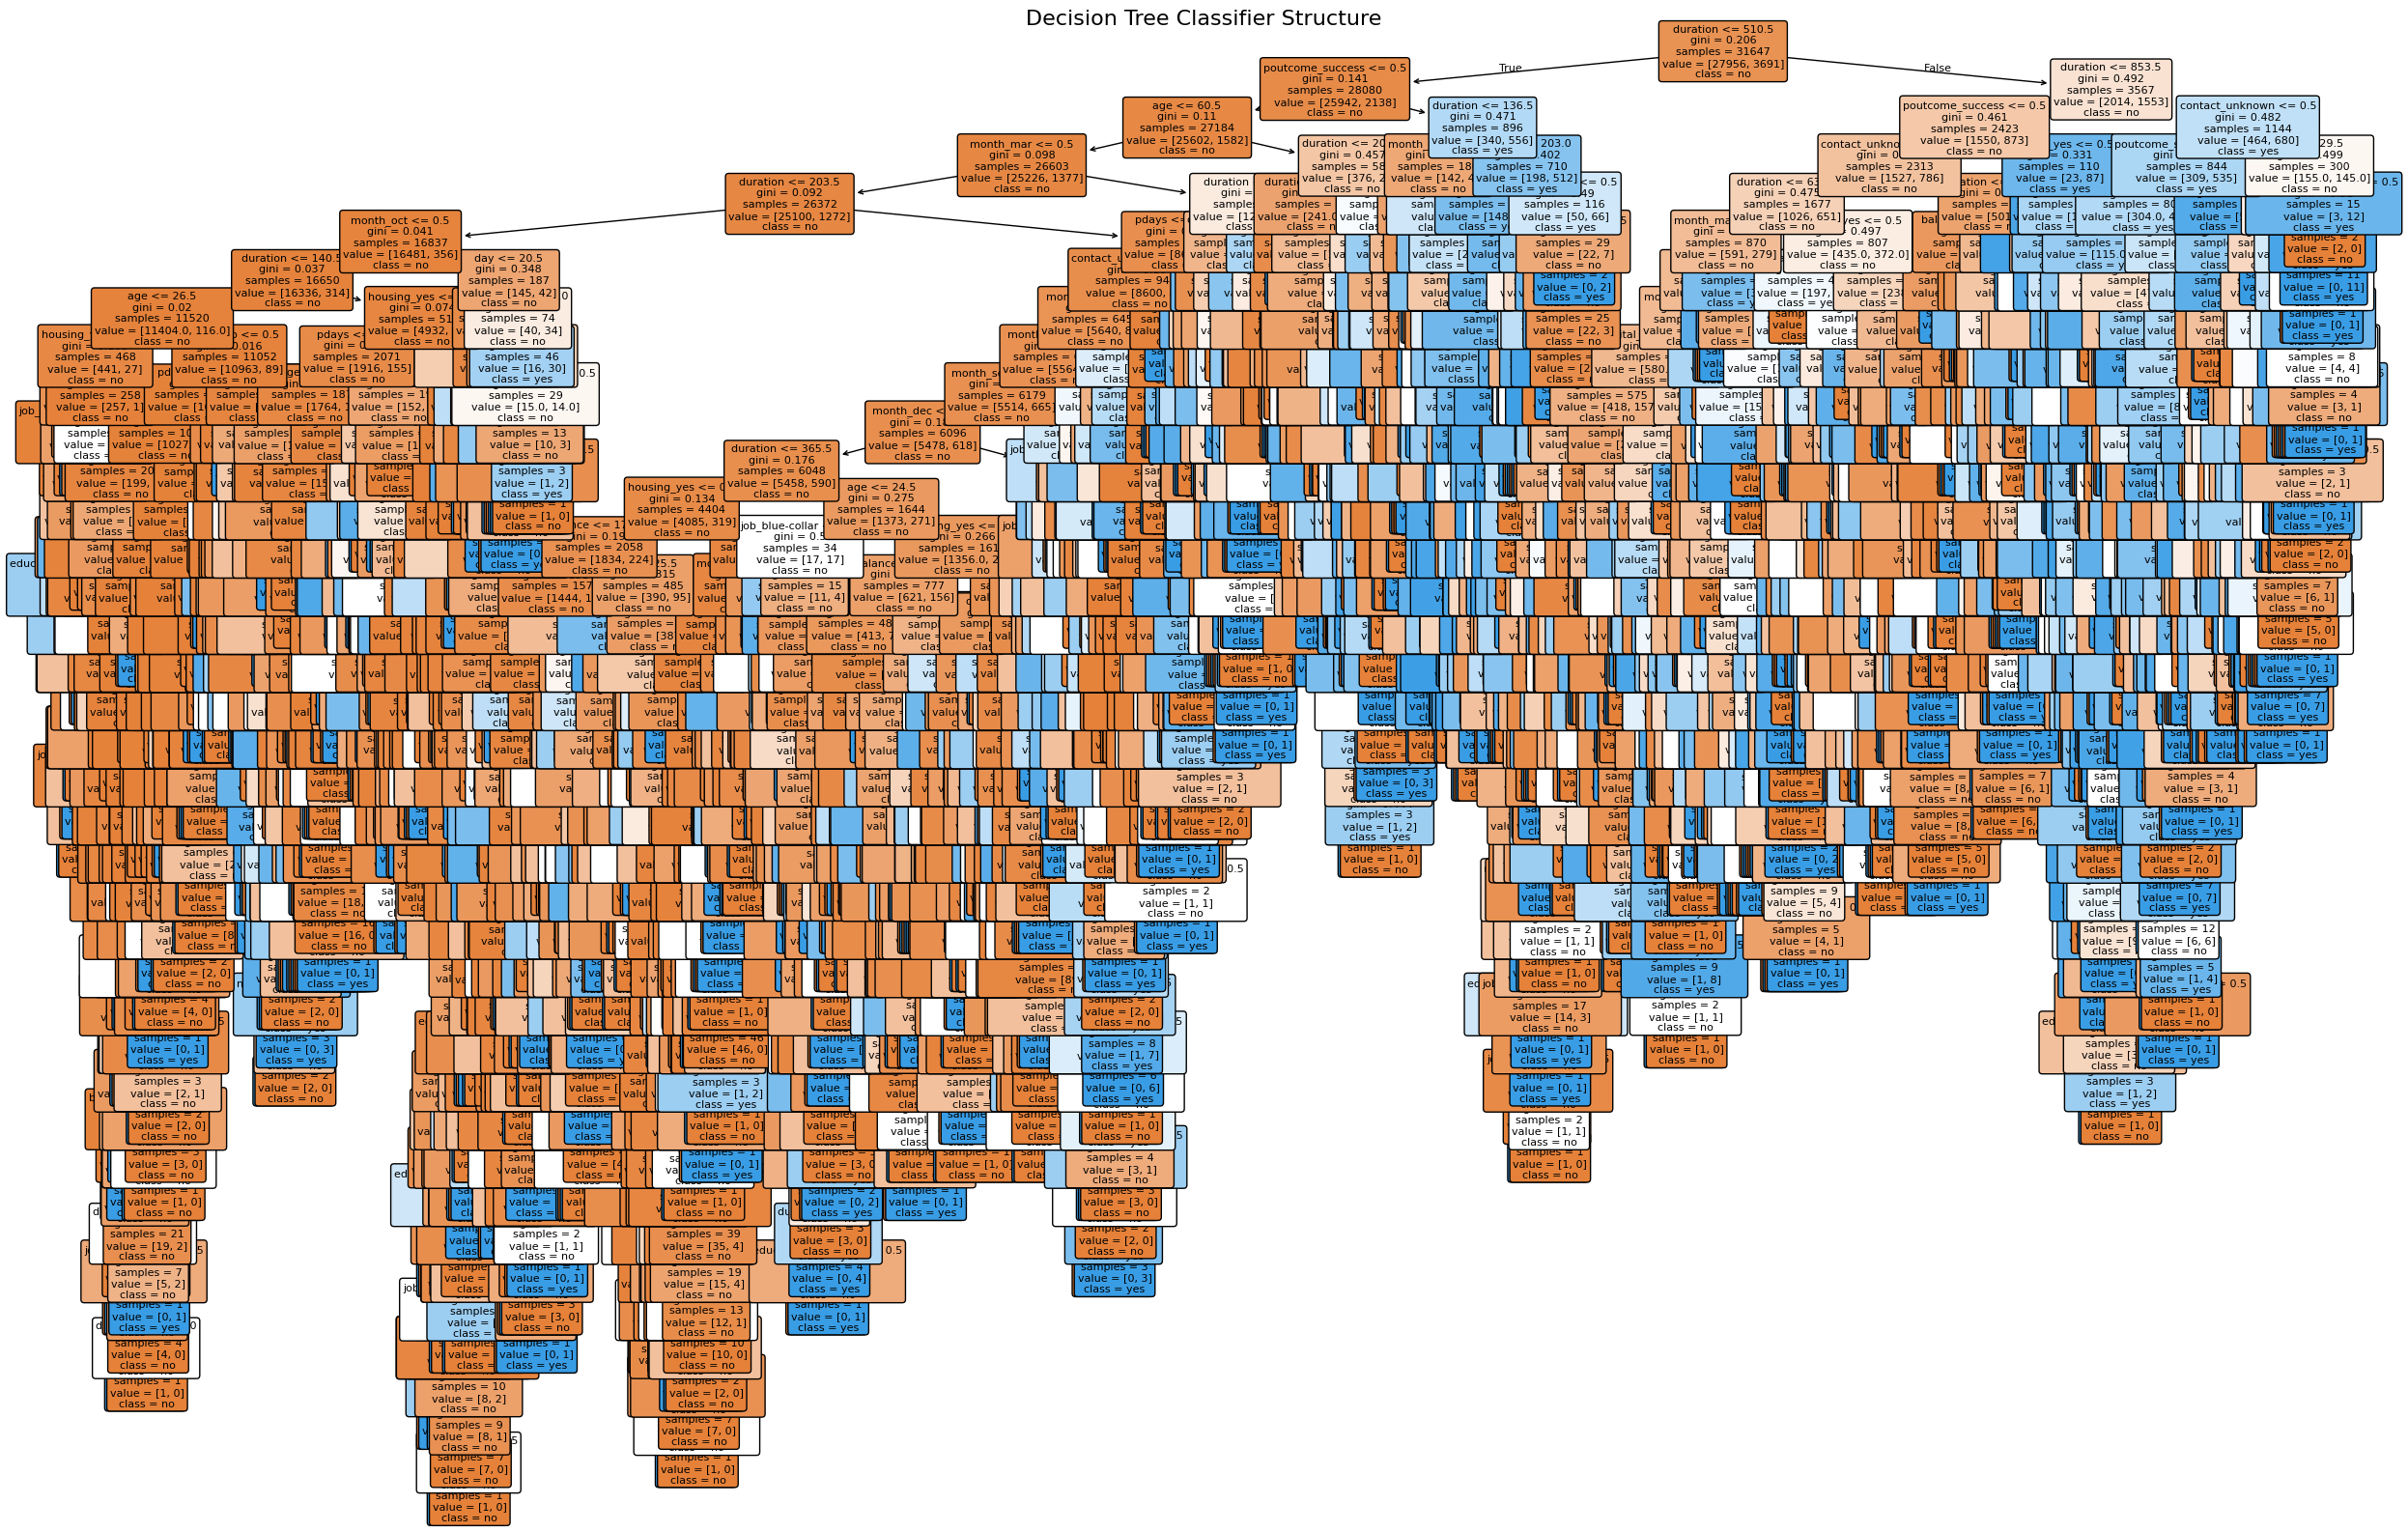

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = X.columns.tolist()

class_names = ['no', 'yes']

plt.figure(figsize=(30, 20))


plot_tree(dt_classifier,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=8)

plt.title("Decision Tree Classifier Structure", fontsize=16)
plt.show()
